In [1]:
import pandas as pd

In [2]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [3]:
# getting avocado prices as data frame

In [4]:
ap = pd.read_csv('avocado_prices.csv')

In [5]:
# 1. convert data to proper format

In [6]:
# convert date field to datetime

In [7]:
ap['date'] = pd.to_datetime(ap['date'])

In [8]:
# 2. Extract month and day from date column, adding two new columns

In [9]:
# Getting the month

In [10]:
ap['month'] = ap['date'].dt.month

In [11]:
# Getting the day

In [12]:
ap['day'] = ap['date'].dt.day

In [13]:
# rename the following columns label: [plu_4046, plu_4225, plu_4770] in [plu_small,plu_large,plu_xlarge] 

In [14]:
ap.rename(columns={'plu_4046'  : 'plu_small',
                   'plu_4225'  : 'plu_large',
                   'plu_4770'  : 'plu_xlarge'}, 
                 inplace=True)

In [15]:
# 4. Add a calendar quarter column based on the month coumn
# Rule: 
#     q1 : [1,2,3]
#     q2 : [4,5,6]
#     q3 : [7,8,9]
#     q4 : [10,11,12]

In [16]:
ap['quarter'] = np.where(ap['month'].between(1, 3, inclusive=True),           'Q1'
                         ,np.where(ap['month'].between(4,6, inclusive=True),  'Q2'
                         ,np.where(ap['month'].between(7,9, inclusive=True),  'Q3'
                         ,np.where(ap['month'].between(10,12, inclusive=True),'Q4','TBD'))))

In [17]:
# 5.  Adding a new currency column (set to USD)

In [18]:
ap['currency'] = 'USD'

In [19]:
# reordering columns manually

In [ ]:
# 6. Adding a revenue column average_price * total_volume

In [22]:
ap['revenue'] = ap['average_price'] * ap['total_volume']

In [24]:
column_names = [
"index"
,"date"
,"year"
,"month"
,"day"
,"quarter"
,"average_price"
,"total_volume"
,"currency"
,"revenue"
,"plu_small"
,"plu_large"
,"plu_xlarge"
,"total_bags"
,"small_bags"
,"large_bags"
,"xlarge_bags"
,"type"
,"region"
]

ap = ap.reindex(columns=column_names)

In [ ]:
# 7. revenue vs quarter (comparing revenues between the quarters, using matplotlib)

In [ ]:
# group by quarter aggregating revenue

In [33]:
ap_r_q = ap.groupby('quarter', as_index=False).agg({"revenue": "sum"})

In [ ]:
# plotting a matplotlib barchart 

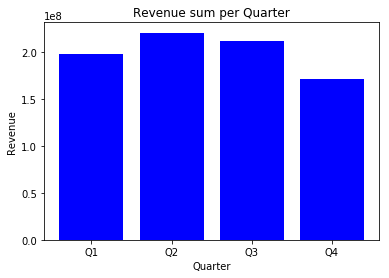

In [42]:
plt.bar(ap_r_q['quarter'], ap_r_q['revenue'], align='center', color = 'b')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Revenue sum per Quarter')
plt.show()

In [ ]:
# Plotting an horizontal bar chart

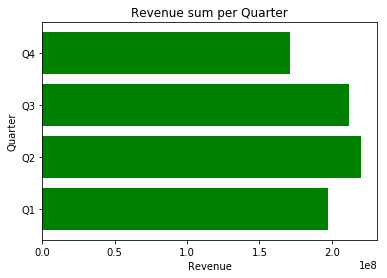

In [45]:
plt.barh(ap_r_q['quarter'], ap_r_q['revenue'], align='center', color = 'g')
plt.xlabel('Revenue')
plt.ylabel('Quarter')
plt.title('Revenue sum per Quarter')
plt.show()

In [ ]:
# Plotting more than one metric in the same barchart

In [50]:
ap_r_q_2 = ap.groupby('quarter', as_index=False).agg({"revenue": "sum","total_volume" : "sum"})
#,"plu_small"
#,"plu_large"
#,"plu_xlarge" 

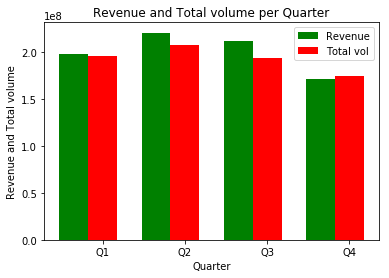

In [65]:
n_groups = 4

index = np.arange(n_groups)

rects1 = plt.bar(index, ap_r_q_2['revenue'],0.35, color = 'g', label = 'Revenue')

rects2 = plt.bar(index + 0.35, ap_r_q_2['total_volume'], 0.35, color = 'r',label = 'Total vol')

plt.xlabel('Quarter')
plt.ylabel('Revenue and Total volume')
plt.title('Revenue and Total volume per Quarter')
plt.xticks(index + 0.35, ('Q1', 'Q2', 'Q3', 'Q4'))
plt.legend()

plt.show()

In [ ]:
# which avocado PLU type has been sold the most per quarter

In [66]:
ap_r_q_3 = ap.groupby('quarter', as_index=False).agg({"plu_small": "sum","plu_large" : "sum", "plu_xlarge" : "sum"})

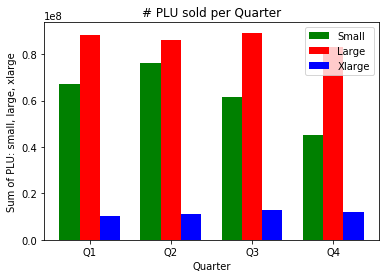

In [88]:
n_groups = 4

index = np.arange(n_groups)

rects1 = plt.bar(index +0.10, ap_r_q_3['plu_small'],0.25, color = 'g', label = 'Small')

rects2 = plt.bar(index + 0.35, ap_r_q_3['plu_large'], 0.25, color = 'r',label = 'Large')

rects3 = plt.bar(index + 0.60, ap_r_q_3['plu_xlarge'], 0.25, color = 'b',label = 'Xlarge')

plt.xlabel('Quarter')
plt.ylabel('Sum of PLU: small, large, xlarge')
plt.title('# PLU sold per Quarter')
plt.xticks(index + 0.35, ('Q1', 'Q2', 'Q3', 'Q4'))
plt.legend()

plt.show()

In [ ]:
# which avocado PLU type has been sold the most per month

In [92]:
ap_r_q_4 = ap.groupby('month', as_index=False).agg({"plu_small": "sum","plu_large" : "sum", "plu_xlarge" : "sum"})

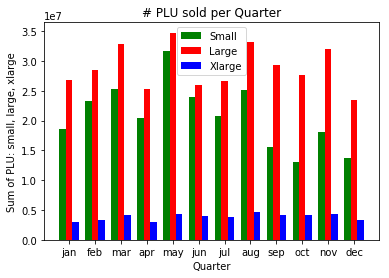

In [94]:
n_groups = 12

index = np.arange(n_groups)

rects1 = plt.bar(index +0.10, ap_r_q_4['plu_small'],0.25, color = 'g', label = 'Small')

rects2 = plt.bar(index + 0.35, ap_r_q_4['plu_large'], 0.25, color = 'r',label = 'Large')

rects3 = plt.bar(index + 0.60, ap_r_q_4['plu_xlarge'], 0.25, color = 'b',label = 'Xlarge')

plt.xlabel('Quarter')
plt.ylabel('Sum of PLU: small, large, xlarge')
plt.title('# PLU sold per Quarter')
plt.xticks(index + 0.35, ('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))
plt.legend()

plt.show()